In [61]:
import scipy.stats as stats
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## 题1
安徽省国民收入与城乡居民存款余额的相关性分析data10-01


In [42]:
data1 = pd.read_excel('data.xlsx', sheetname='data10-01', index_col=0)

In [114]:
data1.head()

,incom,deposit
year,,
1962,34.61,0.59
1963,35.67,0.71
1964,39.52,0.85
1965,47.32,1.00
1966,54.14,1.22


In [37]:
data1.corr(method='pearson')

,incom,deposit
incom,1.000000,0.976209
deposit,0.976209,1.000000


### 分析
收入和存款的pearson相关系数达到0.98，说明收入和存款存在非常强的相关性

## 题2 
用相关矩阵观察起始工资（salbegin）和现工资（salary）与雇员本人个方面条件的关系。Data07-03


In [94]:
data2 = pd.read_excel('data.xlsx', sheetname='data07-03', index_col=0)

将性别数值化，男为1， 女为0

In [95]:
data2['gender'] = data2['gender'].astype('category')
data2['gender'].cat.categories = [0, 1]

计算年龄

In [96]:
from datetime import datetime
now = pd.Timestamp(datetime.now())
data2['bdate'] = pd.to_datetime(data2['bdate'])  
data2['age'] = (now - data2['bdate']).astype('<m8[Y]')

In [115]:
data2.head()

,gender,bdate,educ,jobcat,salary,salbegin,jobtime,prevexp,minority,age
id,,,,,,,,,,
1,1,1952-02-03,15,3,57000,27000,98,144,0,65.0
2,1,1958-05-23,16,1,40200,18750,98,36,0,59.0
3,0,1929-07-26,12,1,21450,12000,98,381,0,88.0
4,0,1947-04-15,8,1,21900,13200,98,190,0,70.0
5,1,1955-02-09,15,1,45000,21000,98,138,0,62.0


计算相关性矩阵

In [99]:
data2.corr()

,educ,jobcat,salary,salbegin,jobtime,prevexp,minority,age
educ,1.000000,0.513854,0.660559,0.633196,0.047379,-0.252353,-0.132889,-0.280766
jobcat,0.513854,1.000000,0.780115,0.754662,0.005329,0.062645,-0.143781,0.010596
salary,0.660559,0.780115,1.000000,0.880117,0.084092,-0.097467,-0.177337,-0.143529
salbegin,0.633196,0.754662,0.880117,1.000000,-0.019753,0.045136,-0.157598,-0.008930
jobtime,0.047379,0.005329,0.084092,-0.019753,1.000000,0.002978,0.049501,0.054419
prevexp,-0.252353,0.062645,-0.097467,0.045136,0.002978,1.000000,0.144747,0.803058
minority,-0.132889,-0.143781,-0.177337,-0.157598,0.049501,0.144747,1.000000,0.111354
age,-0.280766,0.010596,-0.143529,-0.008930,0.054419,0.803058,0.111354,1.000000


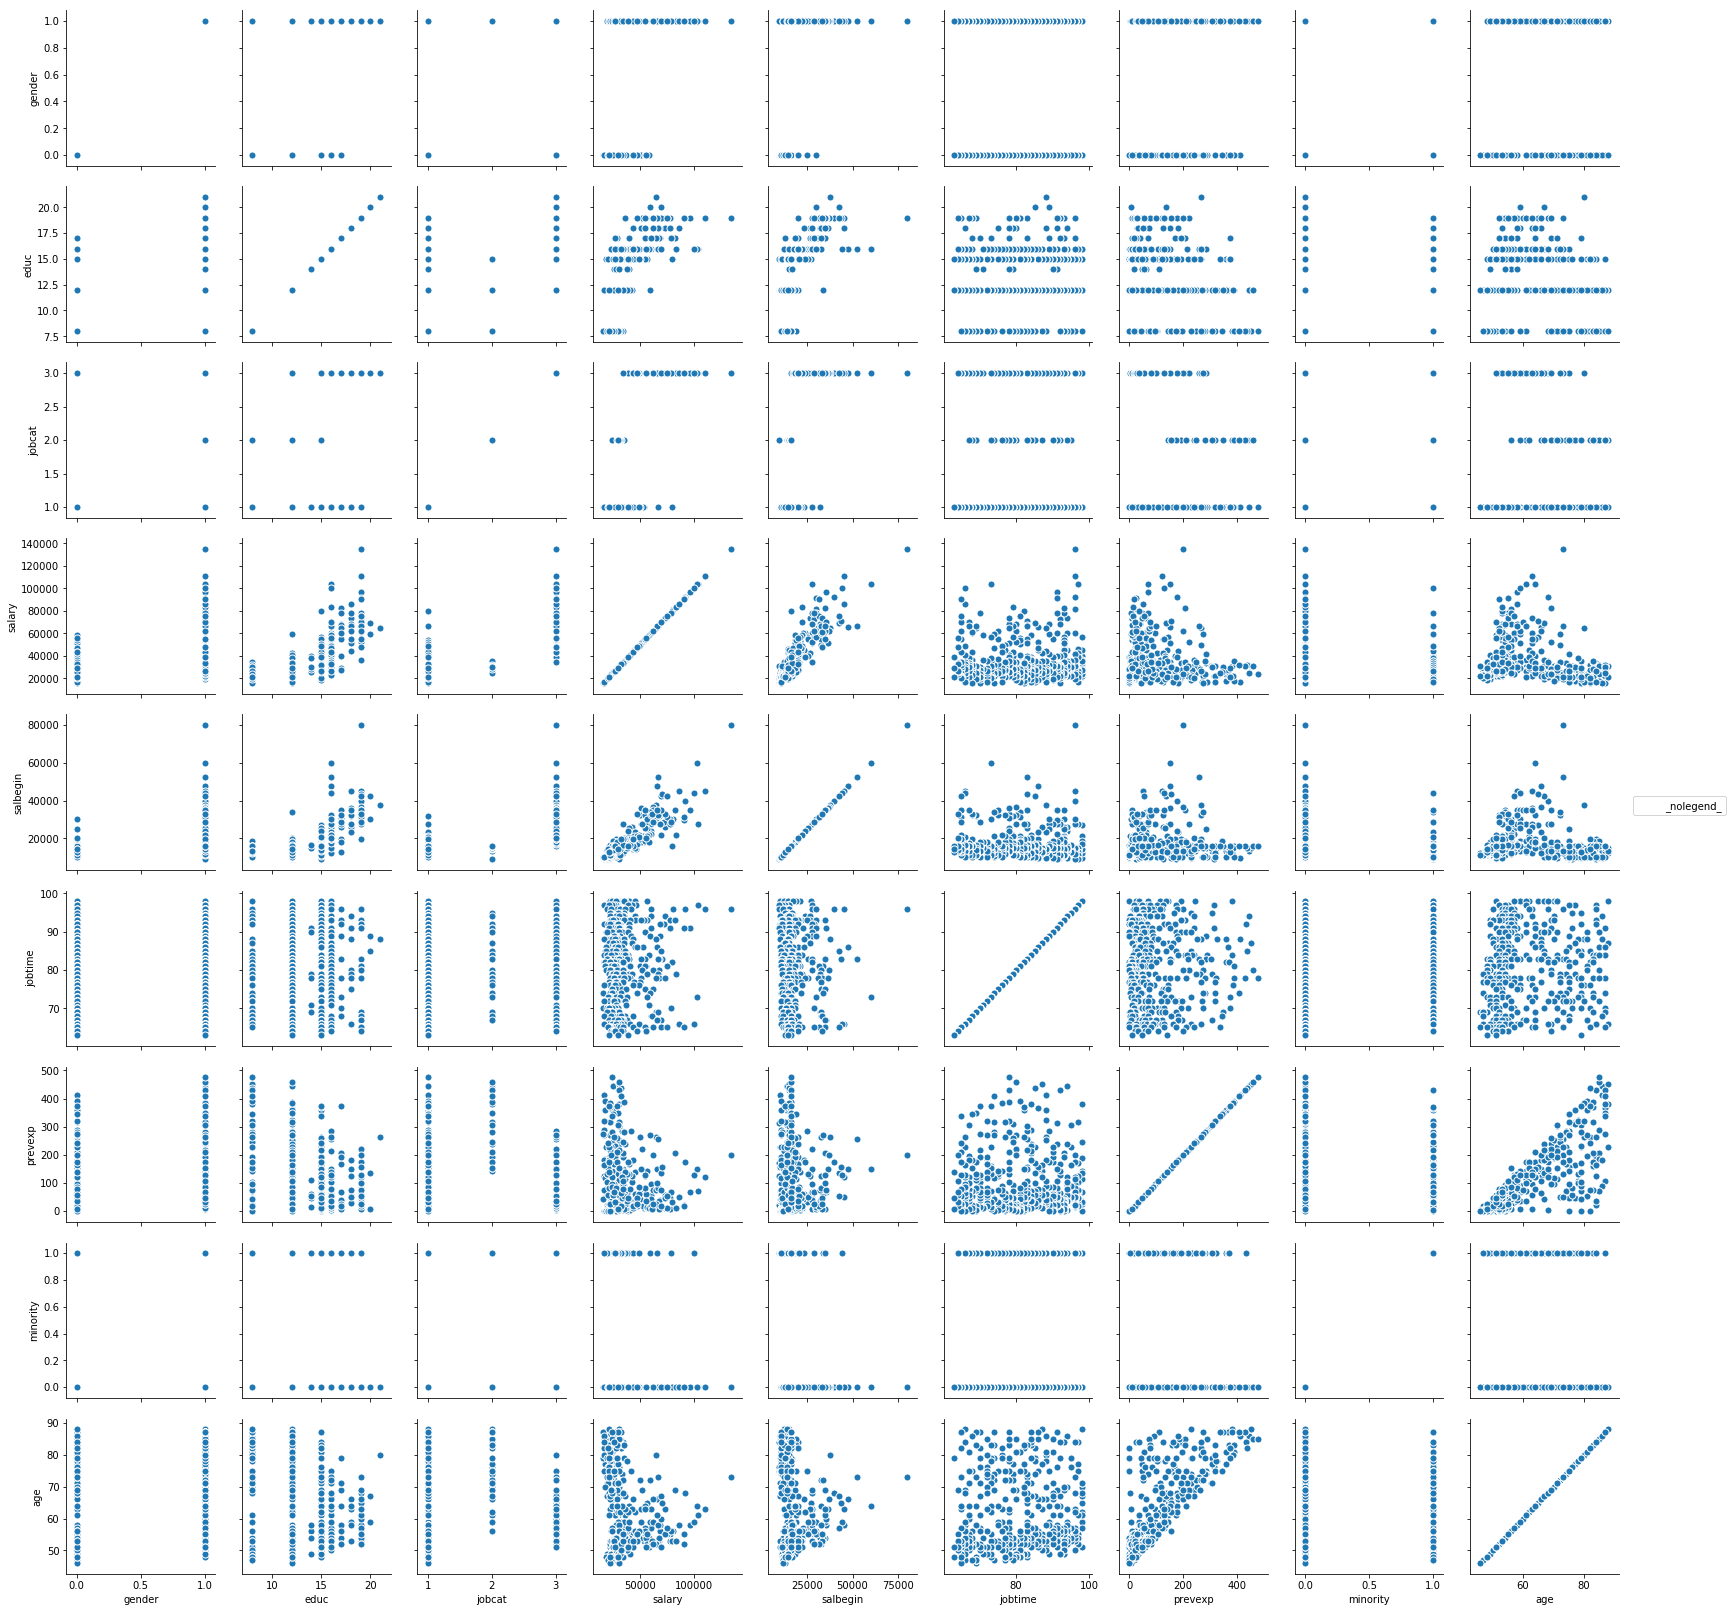

In [100]:
g = sns.PairGrid(data2,  palette="GnBu_d")
g.map(plt.scatter, s=50, edgecolor="white")
g.add_legend();

### 分析
从相关矩阵可以看出：

 - 起始工资(salbegin)和现有工资(salary)有很强的相关性（0.88），说明现有工资很大程度上与起始工资有关
 - 起始工资和现有工资都与工作类型(jobcat)和教育程度(educ)有较强的相关性(~0.7),说明教育程度和工作类型对起始工资和现有工资有较大的影响
 - 起始工资和现有工资与工作年限(jobtime)、工作经验(prevexp)和年龄（age）的相关性非常弱（<0.1），说明工作年限和工作经验对工资几乎没有影响

## 题3
使用四川绵阳地区三年生中山柏的数据，分析月生长量与月平均气温、月降雨量、月平均日照时数、月平均湿度这四个气候因素哪个有关。Data10-03


In [101]:
data3 = pd.read_excel('data.xlsx', sheetname='data10-03', index_col=0)

In [116]:
data3.head()

,hgrow,temp,rain,hsun,humi
month,,,,,
1,0.01,4.2,17.0,54.5,81
2,0.50,7.4,10.8,73.8,79
3,1.50,10.0,17.4,84.7,75
4,10.80,16.1,19.7,137.0,75
5,13.00,21.1,248.7,149.6,77


In [103]:
data3.corr()

,hgrow,temp,rain,hsun,humi
hgrow,1.000000,0.983387,0.709370,0.704429,0.373573
temp,0.983387,1.000000,0.714821,0.690490,0.291983
rain,0.709370,0.714821,1.000000,0.701842,0.384326
hsun,0.704429,0.690490,0.701842,1.000000,-0.050938
humi,0.373573,0.291983,0.384326,-0.050938,1.000000


使用spss的偏相关分析得出的结果

In [113]:
partial = pd.Series(data = [.977,-.491,.632,.731],index = [ 'temp', 'rain', 'hsun', 'humi'])
partial

temp    0.977
rain   -0.491
hsun    0.632
humi    0.731
dtype: float64

### 分析

从spss的偏相关分析结果可以看出：
 
 - 该地区山柏生长于温度有强相关性(0.977)，说明温度对其生长有很大的影响
 - 对比生长与降雨的相关性和偏相关性可以看出，降雨对生长不但没有正的影响，反而有负面的影响，即降雨越多，生长的越慢
 - 日照时间和空气湿度对山柏生长有较强的相关性，说明日照时间和空气湿度是影响该地区山柏生长的重要因素
